<a href="https://colab.research.google.com/github/Talledo/Visualizacion_de_Datos/blob/main/ML_sin_misterios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext autoreload
%autoreload 2

# **Introducción**
Las técnicas de aprendizaje supervisado implican el entrenamiento de un modelo para operar con un conjunto de características y predecir una etiqueta utilizando un conjunto de datos que incluye algunos valores de etiqueta ya conocidos.

El proceso de entrenamiento ajusta las características a las etiquetas conocidas para definir una función general que puede aplicarse a nuevas características cuyas etiquetas se desconocen, y predecirlas.

Se puede pensar en esta función así, en la que **y** representa la etiqueta que queremos predecir y **x** representa las características que el modelo utiliza para predecirla.

$$y = f(x)$$

En la mayoría de los casos, **x** es en realidad un vector que consiste en múltiples valores de características, así que para ser un poco más precisos, la función podría expresarse así

$$y = f([x_1, x_2, x_3, ...])$$

El objetivo del entrenamiento del modelo es encontrar una función que realice algún tipo de cálculo a los valores **x** que produzca el resultado **y**.

Lo hacemos aplicando un algoritmo de aprendizaje automático que intente ajustar los valores **x** a un cálculo que produzca y con una precisión razonable para todos los casos del conjunto de datos de entrenamiento.

Hay muchos algoritmos de aprendizaje automático para el aprendizaje supervisado, y pueden dividirse a grandes rasgos en dos tipos:

* **Algoritmos de regresión:** Algoritmos que predicen un valor y que es un valor numérico, como el precio de una casa o el número de operaciones de venta.
* **Algoritmos de clasificación:** Algoritmos que predicen a qué categoría, o clase, pertenece una observación. El valor y en un modelo de clasificación es un vector de valores de probabilidad entre 0 y 1, uno para cada clase, que indica la probabilidad de que la observación pertenezca a cada clase.

En este cuaderno nos centraremos en **regresión**, utilizando un ejemplo basado en un estudio real en el que se recogen datos de un sistema de bicicletas compartidas y se utilizan para predecir el número de alquileres en función de la estacionalidad y las condiciones meteorológicas.

# Explorar los datos
El primer paso en cualquier proyecto de aprendizaje automático(machine learning) es explorar los datos que se utilizarán para entrenar un modelo.

El objetivo de esta exploración es intentar comprender las relaciones entre sus atributos; en particular, cualquier correlación aparente entre las características y la etiqueta que su modelo intentará predecir.

Esto puede requerir cierto trabajo para detectar y corregir problemas en los datos (como tratar los valores que faltan, los errores o los valores atípicos), derivar nuevas columnas de características transformando o combinando características existentes (un proceso conocido como ingeniería de características), normalizar las características numéricas (valores que se pueden medir o contar) para que estén en una escala similar, y codificar las características categóricas (valores que representan categorías discretas) como indicadores numéricos.

In [ ]:
import pandas as pd

# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data.head()

--2023-11-21 00:26:28--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48800 (48K) [text/plain]
Saving to: ‘daily-bike-share.csv’

daily-bike-share.cs 100%[===================>]  47.66K  --.-KB/s    in 0.01s   

2023-11-21 00:26:28 (4.03 MB/s) - ‘daily-bike-share.csv’ saved [48800/48800]



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82


Los datos se componen de las siguientes columnas:

* **instant:** Un identificador de fila único
* **dteday:** La fecha en la que se observaron los datos - en este caso, los datos se recogieron diariamente; por lo que hay una fila por fecha.
* **season:** Un valor codificado numéricamente que indica la estación (1:primavera, 2:verano, 3:otoño, 4:invierno)
* **yr:** El año del estudio en el que se realizó la observación (el estudio tuvo lugar a lo largo de dos años: el año 0 representa 2011, y el año 1 representa 2012)
* **mnth:** El mes en el que se realizó la observación (1:enero ... 12:diciembre)
* **holiday:** Un valor binario que indica si la observación se realizó o no en un día festivo)
* **weekday:** El día de la semana en que se realizó la observación (0:domingo ... 6:sábado)
* **workingday**: Valor binario que indica si el día es o no laborable (no es fin de semana ni festivo)
* **weathersit:** Un valor categórico que indica la situación meteorológica (1:despejado, 2:niebla/nubes, 3:lluvia ligera/nieve, 4:lluvia fuerte/granizo/nieve/niebla)
* **temp:** La temperatura en grados centígrados (normalizada)
* **atemp:** La temperatura aparente ("sensación") en celsius (normalizada)
* **hum:** El nivel de humedad (normalizado)
* **windspeed:** La velocidad del viento (normalizada)
* **rentals:** El número de alquileres de bicicletas registrados.

En este conjunto de datos, los alquileres representan la etiqueta (el valor y) que nuestro modelo debe ser entrenado para predecir. Las otras columnas son características potenciales (valores x).

Como se ha mencionado anteriormente, se puede realizar algo de ingeniería de características para combinar o derivar nuevas características. Por ejemplo, vamos a añadir una nueva columna llamada day al dataframe extrayendo el componente de día de la columna existente dteday. La nueva columna representa el día del mes del 1 al 31.

In [ ]:
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
bike_data.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals,day
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,1
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,2
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,3
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,4
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,5


* Bien, comencemos nuestro análisis de los datos examinando algunas estadísticas descriptivas clave.
* Podemos utilizar función describe() para las características numéricas, así como la columna de la etiqueta de alquiler.

In [ ]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  rentals     731 non-null    int64  
 14  day         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.8+ KB


In [ ]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
bike_data[numeric_features + ['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


Las estadísticas revelan cierta información sobre la distribución de los datos en cada uno de los campos numéricos, incluyendo el número de observaciones (hay 731 registros), la media, la desviación estándar, los valores mínimos y máximos, y los valores de los cuartiles.

A partir de esto, podemos ver que el número medio de alquileres diarios es de alrededor de **848**; pero hay una desviación estándar comparativamente grande, lo que indica una gran variación en el número de alquileres por día.

Podemos tener una idea más clara de la distribución de los valores de los alquileres visualizando los datos. Los tipos de gráficos más comunes para visualizar las distribuciones de datos numéricos son los histogramas y los gráficos de caja.

# **Entrenando un modelo de regresión**
Ahora que hemos explorado los datos, es el momento de utilizarlos para entrenar un modelo de regresión que utilice las características que hemos identificado como potencialmente predictivas para predecir la etiqueta de alquiler.

Lo primero que tenemos que hacer es separar las características que queremos utilizar para entrenar el modelo de las etiquetas que queremos que prediga.

In [ ]:
# Separar características y etiquetas
X = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values
y = bike_data['rentals'].values

print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[1.        1.        0.        6.        0.        2.        0.344167
  0.363625  0.805833  0.160446 ]
 [1.        1.        0.        0.        0.        2.        0.363478
  0.353739  0.696087  0.248539 ]
 [1.        1.        0.        1.        1.        1.        0.196364
  0.189405  0.437273  0.248309 ]
 [1.        1.        0.        2.        1.        1.        0.2
  0.212122  0.590435  0.160296 ]
 [1.        1.        0.        3.        1.        1.        0.226957
  0.22927   0.436957  0.1869   ]
 [1.        1.        0.        4.        1.        1.        0.204348
  0.233209  0.518261  0.0895652]
 [1.        1.        0.        5.        1.        2.        0.196522
  0.208839  0.498696  0.168726 ]
 [1.        1.        0.        6.        0.        2.        0.165
  0.162254  0.535833  0.266804 ]
 [1.        1.        0.        0.        0.        1.        0.138333
  0.116175  0.434167  0.36195  ]
 [1.        1.        0.        1.        1.        1.        

Después de separar el conjunto de datos, ahora tenemos dos matrices, una llamada X que contienen las características, y una que contienen las etiquetas llamada y.

Podríamos entrenar un modelo utilizando todos los datos, pero es una práctica común en el aprendizaje supervisado dividir los datos en dos subconjuntos: un conjunto (normalmente más grande) con el que entrenar el modelo, y un conjunto más pequeño con el que validar el modelo entrenado.

Esto nos permite evaluar el rendimiento del modelo cuando se utiliza con el conjunto de datos de validación, comparando las etiquetas predichas con las conocidas.

Es importante dividir los datos de forma aleatoria (en lugar de, por ejemplo, tomar el primer 70% de los datos para el entrenamiento y mantener el resto para la validación).

Esto ayuda a garantizar que los dos subconjuntos de datos son estadísticamente comparables (de modo que validamos el modelo con datos que tienen una distribución estadística similar a los datos con los que se entrenó).

Para dividir aleatoriamente los datos, utilizaremos la función train_test_split de la biblioteca scikit-learn. Esta biblioteca es uno de los paquetes de aprendizaje automático más utilizados para Python.

In [ ]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 511 rows
Test Set: 220 rows


In [ ]:
X_train.shape

(511, 10)

Ahora tenemos los siguientes cuatro conjuntos de datos:

* **X_train:** Los valores de las características que utilizaremos para entrenar el modelo
* **y_train:** Las etiquetas correspondientes que utilizaremos para entrenar el modelo
* **X_test:** Los valores de las características que utilizaremos para validar el modelo
* **y_test:** Las etiquetas correspondientes que utilizaremos para validar el modelo

Ahora estamos preparados para entrenar un modelo ajustando un algoritmo de regresión adecuado a los datos de entrenamiento. Utilizaremos un algoritmo de regresión lineal, un punto de partida común para la regresión que funciona tratando de encontrar una relación lineal entre los valores X y la etiqueta y.

En ***Scikit-Learn***, tenemos varios algoritmos y en este caso utilizaremos LinearRegression para entrenar un modelo de regresión lineal.

In [ ]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression() #creo el modelo
model = model.fit(X_train, y_train) #entreno el modelo
print (model)

LinearRegression()


In [ ]:
model.coef_

array([   71.75356438,   -14.5970099 ,  -315.70947115,    11.35736594,
        -838.15406232,   -46.76224   ,  2004.33895862,   -32.69033323,
        -553.31616475, -1229.49259224])

In [ ]:
model.intercept_

985.6007591748308

El modelo resultante sería:



> 985.60 + 71.75(Season) - 14.59(mnth) - 315 ... -1229(windspeed)



# Evaluar el modelo entrenado
Ahora que hemos entrenado el modelo, podemos utilizarlo para predecir el número de rentas para las características que tenemos en nuestro conjunto de datos de validación.

A continuación, podemos comparar estas predicciones con los valores reales de las etiquetas para evaluar si el modelo funciona bien (o no).

In [ ]:
import numpy as np

predictions = model.predict(X_test)
np.set_printoptions(suppress=True)

print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

Predicted labels:  [1896. 1184. 1007.  -28.  314.  385.  475.  590. 1476.  -22.]
Actual labels   :  [2418  754  222   47  244  145  240  555 3252   38]


Comparar cada predicción con su valor real correspondiente no es una forma muy eficaz de determinar lo bien que predice el modelo.

Veamos si podemos obtener una mejor idea visualizando un gráfico de dispersión que compare las predicciones con las etiquetas reales.

También superpondremos una línea de tendencia para tener una idea general de lo bien que se alinean las etiquetas predichas con las verdaderas.

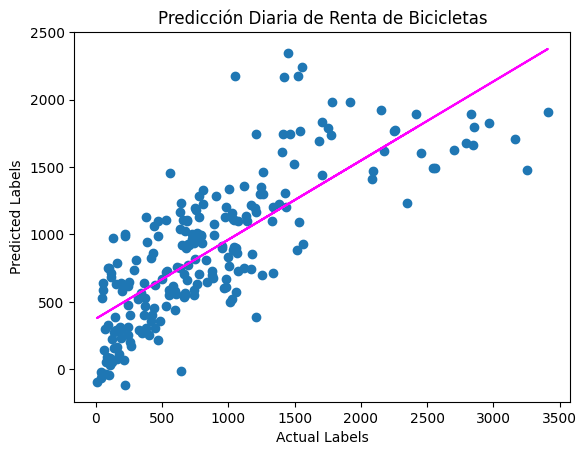

In [ ]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predicción Diaria de Renta de Bicicletas')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Hay una tendencia diagonal definida, y las intersecciones de los valores estimados y reales siguen generalmente la trayectoria de la línea de tendencia; pero hay una buena diferencia entre la función ideal representada por la línea y los resultados.

Esta diferencia representa los residuos(errores) del modelo, es decir, la diferencia entre la etiqueta estimada cuando el modelo se aplica a los datos de validación y el valor real de la etiqueta de los datos validación validación.

Estos residuos(errores), cuando se evalúan a partir de los datos de validación, indican el nivel de error esperado cuando el modelo se utiliza con nuevos datos cuya etiqueta se desconoce.

Podemos cuantificar los residuos calculando una serie de métricas de evaluación de uso común.

Nos centraremos en las tres siguientes:

* **Error cuadrático medio (MSE):** La media de las diferencias al cuadrado entre los valores predichos y los reales. Se trata de una métrica relativa en la que cuanto menor sea el valor, mejor será el ajuste del modelo.

* **Raiz del Error cuadrático medio (RMSE):** La raíz cuadrada del MSE. Se trata de una medida absoluta en la misma unidad que la etiqueta (en este caso, el número de alquileres). Cuanto menor sea el valor, mejor será el modelo (en un sentido simplista, representa el número medio de alquileres por el que las predicciones son erróneas)
* **Coeficiente de determinación (normalmente conocido como R-cuadrado o R2):** Una métrica relativa en la que cuanto más alto sea el valor, mejor será el ajuste del modelo. En esencia, esta métrica representa la parte de la varianza entre los valores estimados y los reales de las etiquetas que el modelo es capaz de explicar.

**Nota:** [Podemo encontrar más información sobre estas y otras métricas para evaluar modelos de regresión en la documentación de Scikit-Learn](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

Utilicemos Scikit-Learn para calcular estas métricas para nuestro modelo, basándonos en las predicciones que generó para los datos de validación.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

mae= mean_absolute_error(y_test, predictions)
print("MAE:", mae)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 201972.55947035595
RMSE: 449.4135728595165
MAE: 322.99762918984186
R2: 0.604045473691919


Así que ahora hemos cuantificado la capacidad de nuestro modelo para predecir el número de alquileres. Definitivamente tiene cierto poder de predicción, ¡pero seguramente podemos hacerlo mejor!

Resumen
Aquí hemos explorado nuestros datos y hemos ajustado un modelo de regresión básico.

# Referencias

*   https://towardsdatascience.com/supervised-learning-algorithms-cheat-sheet-40009e7f29f5
*   https://gitlab.com/Winston-90/supervised_algorithms/-/blob/main/Supervised%20Learning%20Algorithms.md
* https://people.smp.uq.edu.au/DirkKroese/DSML/DSML.pdf
* https://github.com/DSML-book/Programs
* https://www.analyticsvidhya.com/blog/2015/08/comprehensive-guide-regression/?utm_source=blog&utm_medium=RideandLassoRegressionarticle
* https://dafriedman97.github.io/mlbook/content/introduction.html




# **Haciendo un Predict para nuevos datos**

In [ ]:
caracteristicas = [[1,2,0,6,0,1,0.25,0.30,0.40,0.12]]
renta = model.predict(caracteristicas)

#'season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed'

In [ ]:
print(np.round(renta))

[1172.]


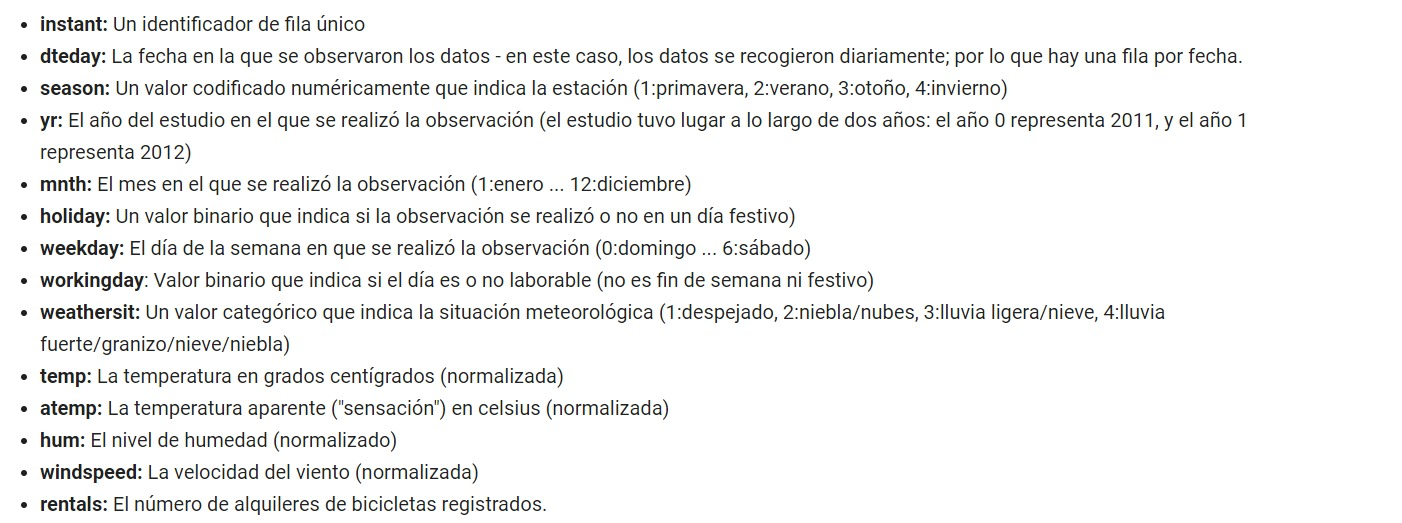

# DEBER


* Diseñar una posible interface para la empresa que renta bicicletas ( en papel, paint, canvas, powerpoint, etc )


* [Cuaderno de Tarea](https://colab.research.google.com/drive/1m0RobbbExNl4d7_D5HqtU44QkGVN9xeQ?usp=sharing)
